In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$\mathrm{minimize:~}-t(\mu^{\prime},r)\Bigg[\!\!\begin{array}{c}{{x}}\\ {{x_{n+1}}}\end{array}\!\Bigg]+\frac{\mathrm{1}}{2}\left[\begin{array}{c l}{{x}}&{{0}}\\ {{\alpha_{n+1}}}\end{array}\right]\left[\begin{array}{c l}{{\Sigma}}&{{0}}\\ {{0^{\prime}}}&{{0}}\end{array}\right]\left[\begin{array}{c}{{x}}\\ {{x_{n+1}}}\end{array}\right]$

$\mathrm{subject~to:~} \mu^{\prime}x\ +\ x_{n+1}=1$

$\text{In partitioned matrix form, the optimality conditions for (3. 1) are}$

$t\left[\begin{array}{c}{{\mu}}\\ {{r}}\end{array}\right]\;-\;\left[\begin{array}{c}{{\Sigma}}\\ {{0^{\prime}}}\end{array}\right]\left[\begin{array}{c}{{x}}\\ {{x_{n+1}}}\end{array}\right]\;=\;u\left[\begin{array}{c}{{l}}\\ {{1}}\end{array}\right],$

$l^{\prime}x\ +\ x_{n+1}\ =\ 1.$

$\text{Capital Market Line}$

$\mu_{p}\;-\;r\;=\;\sigma_{p}[\big(\mu\;-\;r l\big)^{\prime}\Sigma^{-1}\big(\mu\;-\;r l\big)]^{\frac{1}{2}}.$

In [4]:
n = 3
mu = np.array([1.1, 1.2, 1.3]).reshape(-1, 1)
cov = [[10**-2, 0 , 0], [0, 5*10**-2 , 0], [0, 0 , 7*10**-2]]
l = np.ones(n).reshape(-1, 1)
r = 1.02

$\left(\mu-r l\right)^{\prime}\Sigma^{-1}(\mu-r l)$

In [8]:
sr = np.transpose(mu - r * l) @ np.linalg.inv(cov) @ (mu - r * l)

In [9]:
sigma_p = np.linspace(0, 0.5, 50)
mu_p = r + np.sqrt(sr) * sigma_p

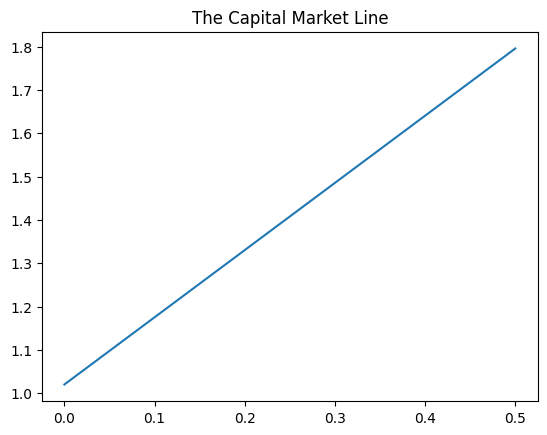

In [21]:
plt.title('The Capital Market Line')
plt.plot(sigma_p , mu_p.reshape(-1))

$t_{m}~=~\frac{1}{l^{\prime}\Sigma^{-1}(\mu-r l)}.$

In [20]:
tm = 1 / (np.transpose(l) @ np.linalg.inv(cov) @ (mu - r * l))
tm

array([[0.06410256]])

$\begin{array}{l l l}{{x_{m}}}&{{=}}&{{t_{m}\Sigma^{-1}(\mu-r l)}}\end{array}$

In [19]:
xm = tm * np.linalg.inv(cov) @ (mu - r * l)
xm

array([[0.51282051],
       [0.23076923],
       [0.25641026]])

In [25]:
mu_m = np.transpose(xm) @ mu
sigma_m2 = np.transpose(xm) @ cov @ xm

# slope of CML
(mu_m - r) / np.sqrt(sigma_m2)

array([[1.55177318]])

Security Market Line

In [29]:
r * l + ((mu_m - r) / sigma_m2) * cov @ xm

array([[1.1],
       [1.2],
       [1.3]])